<a href="https://colab.research.google.com/github/beyzahiz/Transfer-Learning-Fruit-Classification/blob/main/Transfer_Learning_Fruit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
!unzip -n /content/drive/MyDrive/transfer_learning_fruit_dataset/fruits.zip -d /content/

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: /content/fruits-360_original-size/fruits-360-original-size/Validation/Raspberry 3/r0_17.jpg  
  inflating: /content/fruits-360_original-size/fruits-360-original-size/Validation/Raspberry 3/r0_173.jpg  
  inflating: /content/fruits-360_original-size/fruits-360-original-size/Validation/Raspberry 3/r0_177.jpg  
  inflating: /content/fruits-360_original-size/fruits-360-original-size/Validation/Raspberry 3/r0_181.jpg  
  inflating: /content/fruits-360_original-size/fruits-360-original-size/Validation/Raspberry 3/r0_185.jpg  
  inflating: /content/fruits-360_original-size/fruits-360-original-size/Validation/Raspberry 3/r0_189.jpg  
  inflating: /content/fruits-360_original-size/fruits-360-original-size/Validation/Raspberry 3/r0_193.jpg  
  inflating: /content/fruits-360_original-size/fruits-360-original-size/Validation/Raspberry 3/r0_197.jpg  
  inflating: /content/fruits-360_original-size/fruits-360-original-size/Validation/Raspber

In [3]:
import os
print(os.listdir("/content"))
print(os.listdir("/content/fruits-360_100x100"))

['.config', 'fruits-360_meta', 'fruits-360_3-body-problem', 'fruits-360_multi', 'fruits-360_100x100', 'fruits-360_original-size', 'drive', 'sample_data']
['fruits-360']


In [4]:
print(os.listdir("/content/fruits-360_100x100"))
print(os.listdir("/content/fruits-360_100x100/fruits-360"))
print(len(os.listdir("/content/fruits-360_100x100/fruits-360/Training")))

['fruits-360']
['LICENSE', 'README.md', 'Test', 'Training']
251


In [5]:
import os

train_path = "/content/fruits-360_100x100/fruits-360/Training"
classes = os.listdir(train_path)

print("Toplam class:", len(classes))
print("İlk 20 class:")
print(classes[:20])

Toplam class: 251
İlk 20 class:
['Tomato Cherry Maroon 1', 'Apple 13', 'Pear 1', 'Tomato 4', 'Cucumber 1', 'Apple Crimson Snow 1', 'Pepper 2', 'Pepper Orange 2', 'Apple Golden 3', 'Cucumber 7', 'Pear 12', 'Banana Red 1', 'Caju seed 1', 'Banana 1', 'Cucumber 6', 'Plum 5', 'Pepper Red 4', 'Almonds 1', 'Pear 6', 'Watermelon 1']


In [6]:
import os
import shutil

# Orijinal dataset yolu
base_path = "/content/fruits-360_100x100/fruits-360"
train_path = os.path.join(base_path, "Training")
test_path = os.path.join(base_path, "Test")

# Yeni küçük dataset yolu
small_base = "/content/fruits_small"
small_train = os.path.join(small_base, "Training")
small_test = os.path.join(small_base, "Test")

os.makedirs(small_train, exist_ok=True)
os.makedirs(small_test, exist_ok=True)

# Seçilen 10 class
selected_classes = [
    "Apple Granny Smith 1",
    "Pineapple 1",
    "Raspberry 2",
    "Mandarine 1",
    "Cauliflower 1",
    "Pepper Yellow 1",
    "Pear Williams 1",
    "Cucumber 11",
    "Cherry 5",
    "Nut 4"
]

# Kopyalama işlemi
for cls in selected_classes:
    shutil.copytree(os.path.join(train_path, cls), os.path.join(small_train, cls))
    shutil.copytree(os.path.join(test_path, cls), os.path.join(small_test, cls))

print("Küçük dataset oluşturuldu.")

Küçük dataset oluşturuldu.


In [7]:
print(len(os.listdir("/content/fruits_small/Training")))

10


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/content/fruits_small/Training"
test_dir = "/content/fruits_small/Test"

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(  #klasörleri labela çevirir
    train_dir,
    target_size=(100,100),
    batch_size=32,
    class_mode='categorical'  #one hot encoding
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(100,100),
    batch_size=32,
    class_mode='categorical'
)

Found 4933 images belonging to 10 classes.
Found 1648 images belonging to 10 classes.


In [10]:
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(
    weights='imagenet',  #eğitilmiş veri seti yüklenir
    include_top=False,  #son classification katmanları atılır, boş alan açılır
    input_shape=(100,100,3)
)

/tmp/ipython-input-533/1675241793.py:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [11]:
base_model.trainable = False
#modeli ilk eğitimle bozmak istenmiyor o yüzden freezing yapılıyor
#küçük dataset ile tüm ağı yeniden eğitmek riskli, sadece üst katmanlar eğitilecek

In [12]:
from tensorflow.keras import layers, models

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=5
)

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


155/155 ━━━━━━━━━━━━━━━━━━━━ 49s 207ms/step - accuracy: 0.9187 - loss: 0.3030 - val_accuracy: 1.0000 - val_loss: 3.3488e-04
Epoch 2/5
155/155 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 1.0000 - loss: 1.6742e-04 - val_accuracy: 1.0000 - val_loss: 2.0487e-04
Epoch 3/5
155/155 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 1.0000 - loss: 8.8808e-05 - val_accuracy: 1.0000 - val_loss: 1.3710e-04
Epoch 4/5
155/155 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 1.0000 - loss: 5.7659e-05 - val_accuracy: 1.0000 - val_loss: 1.0009e-04
Epoch 5/5
155/155 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 1.0000 - loss: 3.9373e-05 - val_accuracy: 1.0000 - val_loss: 7.7816e-05


In [16]:
len(base_model.layers) #kaç layer var

154

In [17]:
#Fine Tuning
# Modelin son katmanlarını açıp tekrardan eğitmek böylece model çok ince detayları daha iyi öğrenmek için güncelleniyor
len(base_model.layers) #kaç layer var

base_model.trainable = True  #bütün katmanlar açılıyor
for layer in base_model.layers[:-20]:  #son 20 katman hariç hepsi yine freezeleniyor
  layer.trainable = False


from tensorflow.keras.optimizers import Adam

model.compile(  #Fine-tuningde büyük learning rate kullanılırsa ImageNet bilgisi bozulur
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_fine = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=3
)

Epoch 1/3
155/155 ━━━━━━━━━━━━━━━━━━━━ 31s 115ms/step - accuracy: 0.9998 - loss: 0.0124 - val_accuracy: 1.0000 - val_loss: 4.4923e-05
Epoch 2/3
155/155 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 1.0000 - val_loss: 3.8665e-05
Epoch 3/3
155/155 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 3.9838e-05


In [19]:
#Data Augmentation

train_datagen_aug = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    zoom_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True
)

train_generator_aug = train_datagen_aug.flow_from_directory(  #bu kuralları klasördeki dosyalara uygular
    train_dir,
    target_size=(100,100),
    batch_size=32,
    class_mode='categorical'
)

Found 4933 images belonging to 10 classes.


In [20]:
base_model.trainable = False #data augmentation sonrası yeni bilgiler görünce bozulablir model
#o yüzden fine tuning kapattım

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

history_aug = model.fit(
    train_generator_aug,
    validation_data = test_generator,
    epochs = 5
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
155/155 ━━━━━━━━━━━━━━━━━━━━ 37s 182ms/step - accuracy: 0.9991 - loss: 0.0057 - val_accuracy: 1.0000 - val_loss: 1.6199e-06
Epoch 2/5
155/155 ━━━━━━━━━━━━━━━━━━━━ 18s 114ms/step - accuracy: 0.9995 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 2.2149e-07
Epoch 3/5
155/155 ━━━━━━━━━━━━━━━━━━━━ 17s 110ms/step - accuracy: 0.9995 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 2.1701e-09
Epoch 4/5
155/155 ━━━━━━━━━━━━━━━━━━━━ 18s 115ms/step - accuracy: 0.9995 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 1.8807e-09
Epoch 5/5
155/155 ━━━━━━━━━━━━━━━━━━━━ 19s 124ms/step - accuracy: 1.0000 - loss: 5.0159e-04 - val_accuracy: 1.0000 - val_loss: 5.5914e-08


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Gerçek class:  Raspberry 2
Tahmin edilen class:  Raspberry 2


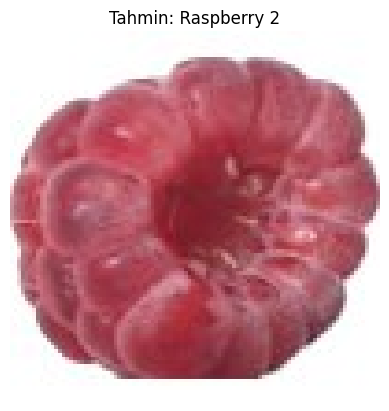

In [22]:
#Test

import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

test_dir = "/content/fruits_small/Test"
classes = os.listdir(test_dir)
class_name = random.choice(classes)

#rastgele resim seçme
img_name = random.choice(os.listdir(os.path.join(test_dir, class_name)))
img_path = os.path.join(test_dir, class_name, img_name)

#resmi yükleme
img = image.load_img(img_path, target_size=(100,100))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

#tahmin
prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction)

#class indexi class name e çevirme
class_indices = train_generator.class_indices
index_to_class = {v: k for k, v in class_indices.items()}
predicted_class = index_to_class[predicted_class_index]

plt.imshow(img)
plt.title("Tahmin: " + predicted_class)
plt.axis("off")

print("Gerçek class: ", class_name)
print("Tahmin edilen class: ", predicted_class)